# 使用深度學習進行風格轉換
- Neural Style Transfer

這篇文章是結合`深度學習`、`使用者介面`、`GitHub運用`的成果。

## 說明

- 2015年的[A Neural Algorithm of Artistic Style
](https://arxiv.org/abs/1508.06576)論文引入了所謂風格轉換的概念，Tensorflow也有辦法呈現，如[此篇](http://www.chioka.in/tensorflow-implementation-neural-algorithm-of-artistic-style)。
- 也有好心人士將上述程式的資源基礎，進一步建立UI進行實作，如[Easy Neural Style Transfer With Google Colab](https://medium.com/@lawrencedikeu/easy-neural-style-transfer-with-google-colab-a3264789d6ed)更輕鬆地實現以下成果。
 ![](https://miro.medium.com/max/400/1*WiWNhwqj8_uZmfG1TJ9XIQ.jpeg)
 ![](https://miro.medium.com/max/1194/1*YQYnNoqUXwDyhPqDqJ7CzA.jpeg)

# 進行Neural Style Transfer

## Clone the repository
從Github clone指定的repo

In [2]:
%tensorflow_version 1.x

# 先刪除可能已經存在的資料夾
!rm -r ComputerVision NeuralStyleTransfer

!git clone https://github.com/ldfrancis/ComputerVision.git
  
!cp -r ComputerVision/NeuralStyleTransfer .


rm: cannot remove 'ComputerVision': No such file or directory
rm: cannot remove 'NeuralStyleTransfer': No such file or directory
Cloning into 'ComputerVision'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 691 (delta 28), reused 56 (delta 15), pack-reused 603
Receiving objects: 100% (691/691), 33.01 MiB | 3.80 MiB/s, done.
Resolving deltas: 100% (309/309), done.


## 上傳圖片
- 可以透過以下`google.colab.files.upload()`上傳兩張圖片，並且將內容圖片命名為“ content.jpg”，風格圖片命名為“ style.jpg”
- 修改檔案名稱可以透過左方File頁籤執行。

In [0]:
#from google.colab import files
#files.upload()

In [5]:
!wget -O content.jpg https://i.ytimg.com/vi/ge5fv68bmng/maxresdefault.jpg
!wget -O style.jpg https://img.4gamers.com.tw/puku-clone-version/9bb92ca6c728cc07f08f420e8682c9b2a0bcaee6.jpg

--2020-02-20 03:11:46--  https://i.ytimg.com/vi/ge5fv68bmng/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 108.177.126.119, 2a00:1450:4013:c01::77
Connecting to i.ytimg.com (i.ytimg.com)|108.177.126.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78503 (77K) [image/jpeg]
Saving to: ‘content.jpg’

content.jpg         100%[===================>]  76.66K  --.-KB/s    in 0.001s  

2020-02-20 03:11:46 (123 MB/s) - ‘content.jpg’ saved [78503/78503]

--2020-02-20 03:11:48--  https://img.4gamers.com.tw/puku-clone-version/9bb92ca6c728cc07f08f420e8682c9b2a0bcaee6.jpg
Resolving img.4gamers.com.tw (img.4gamers.com.tw)... 13.225.73.38, 13.225.73.59, 13.225.73.51, ...
Connecting to img.4gamers.com.tw (img.4gamers.com.tw)|13.225.73.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166275 (162K) [image/jpeg]
Saving to: ‘style.jpg’

style.jpg           100%[===================>] 162.38K   299KB/s    in 0.5s    

2020-02-20 03:11:50 (299 

## 設定
- 兩個圖片應該要尺寸相同，故透過自設定`IMAGE_HEIGHT` and `IMAGE_WIDTH`兩個變數指定高度與寬度
- 設定迭代次數 


In [0]:
CONTENT_IMAGE = "content.jpg" 
STYLE_IMAGE = "style.jpg"

IMAGE_HEIGHT = 300
IMAGE_WIDTH = 400

ITERATION = 200

配合Colab目錄指定路徑

In [0]:
path_to_content_image = "/content/"+CONTENT_IMAGE
path_to_style_image = "/content/"+STYLE_IMAGE

## 檢視資料

In [0]:
import matplotlib.pyplot as plt
c_image = plt.imread(path_to_content_image)
s_image = plt.imread(path_to_style_image)

Content Image of size (height, width) => (720, 1280)


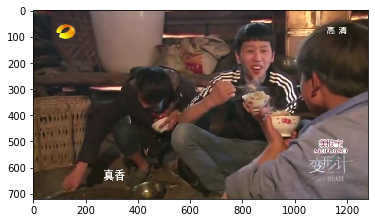

In [10]:
print("Content Image of size (height, width) => {0}".format(c_image.shape[:-1]))
plt.imshow(c_image)

Style Image of size (height, width) => (720, 1280)


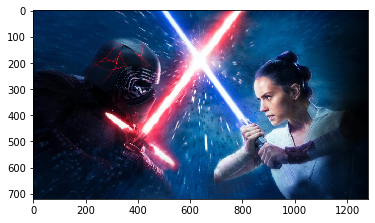

In [11]:
print("Style Image of size (height, width) => {0}".format(s_image.shape[:-1]))
plt.imshow(s_image)

## 訓練生成圖像

- 作者已經將使用TensorFlow的神經網路程式碼寫在NeuralStyleTransfer資料夾的implementNTS.py檔案，詳細內容應查閱程式檔案。
- 同學可藉機熟悉使用別人模組的過程。
- 迭代次數可以增加達到更好的效果。


In [12]:
from NeuralStyleTransfer import implementNTS as NST

NST.setImageDim(IMAGE_WIDTH,IMAGE_HEIGHT)

NST.run(ITERATION, style_image=path_to_style_image, content_image=path_to_content_image)


downloading...
*done*



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Iteration 20 :
total cost = 226200200000.0
content cost = 20451.586
style cost = 2245113900.0
total variational loss =  8443358.0
Time elapsed:  2.794769525527954
Iteration 40 :
total cost = 107810990000.0
content cost = 22311.184
style cost = 1059165600.0
total variational loss =  9471348.0
Time elapsed:  0.5221710205078125
Iteration 60 :
total cost = 67249213000.0
content cost = 22787.164
style cost = 653009800.0
total variational loss =  9740308.0
Time elapsed:  0.5182802677154541
Iteration 80 :
total cost = 47342993000.0
content cost = 23183.555
style cost = 453865500.0
total variational loss =  9781350.0
Time elapsed:  0.5184240341186523
Iteration 100 :
total cost = 35650660000.0
content cost = 23520.053
style cost = 337034240.0
total variational loss =  9735291.0
Time elapsed:  0.5676023960113525
Iteration 120 :
total cost = 28264436000.0
content cost = 23765.71

In [0]:
!ls NeuralStyleTransfer/output/

100.jpg  200.jpg  generated_image.jpg  oimage


## 查看產生的結果

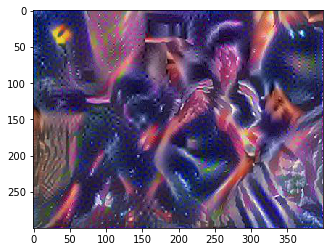

In [13]:
generated_image_path = "/content/NeuralStyleTransfer/output/generated_image.jpg"
image = plt.imread(generated_image_path)
plt.imshow(image)

In [0]:
# 下載檔案
files.download("NeuralStyleTransfer/output/generated_image.jpg") 

## 後記
- 此篇文章精華在於，將Neural Style Transfer這樣有複雜的程式過程包裝成很輕鬆運用的過程。
- 還有沒有可能更好？

- 參考
 - [Easy Neural Style Transfer With Google Colab
](https://medium.com/@lawrencedikeu/easy-neural-style-transfer-with-google-colab-a3264789d6ed)